<font size="6"> **ML Factor Research** </font>

Perform a factor return evaluation to alpha factors yielded by selected models and by champion model

In [1]:
%%capture
%run 04_alphaml_feat_eng.ipynb

In [2]:
MODEL_VERSION = 'v02'
print('Model version: ', MODEL_VERSION)

Model version:  v02


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import ParameterGrid

import pickle

In [4]:
from mle_quant_utils import mle_utils

In [5]:
splits = cfg['models']['alpha_ml']['splits']
split_col = cfg['models']['alpha_ml']['split_col']

In [6]:
INPATH =  "../data/" + cfg['output']['main'] + "/" + cfg['output']['alpha_factors_ml']['folder'] + "/" + MODEL_VERSION +"/"
INFILE1 = cfg['output']['alpha_factors_ml']['features']
INFILE2 = cfg['output']['alpha_factors_ml']['targets']
INFILE3 = cfg['output']['alpha_factors_ml']['model']

In [7]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_context("talk")

# Load Models

In [8]:
model_backlog_path = INPATH + "models_backlog" + "/"
model_backlog_ls = os.listdir(model_backlog_path)
print(model_backlog_path )

../data/output/alpha_factors_ml/v02/models_backlog/


In [9]:
lin_raw_models, rid_raw_models, rf_raw_models = [], [], []
lin_raw_models_names = [x for x in model_backlog_ls if x.startswith("01_raw_lin_")]
rid_raw_models_names = [x for x in model_backlog_ls if x.startswith("02_raw_ridge_")]
rf_raw_models_names = [x for x in model_backlog_ls if x.startswith("03_raw_rf_")]

for model in lin_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        lin_raw_models.append(pickle.load(file))
for model in rid_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        rid_raw_models.append(pickle.load(file))
for model in rf_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        rf_raw_models.append(pickle.load(file))
with open(INPATH + INFILE3, 'rb') as file:
    champ_mod_refit = pickle.load(file)

In [10]:
champ_mod_refit

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=123, verbose=0, warm_start=False)

In [11]:
results_sum_df = pd.read_csv(model_backlog_path + 'model_results.csv',index_col=['model', 'index'])
results_sum_df

alpha  n_estimators  min_samples_leaf  max_features  \
model          index                                                            
01_raw_lin_reg 0            NaN           NaN               NaN           NaN   
02_raw_ridge   0          0.001           NaN               NaN           NaN   
               1          0.010           NaN               NaN           NaN   
               2          0.100           NaN               NaN           NaN   
               3          1.000           NaN               NaN           NaN   
               4         10.000           NaN               NaN           NaN   
               5        100.000           NaN               NaN           NaN   
               6       1000.000           NaN               NaN           NaN   
               7      10000.000           NaN               NaN           NaN   
03_raw_rf      0            NaN         100.0             500.0          0.50   
               1            NaN         100.0            2500.0          0.50   
               2            NaN         100.0            5000.0          0.50   
               3            NaN         100.0           10000.0          0.50   
               4            NaN         100.0             500.0          0.75   
               5            NaN         100.0            2500.0          0.75   
               6            NaN         100.0            5000.0          0.75   
               7            NaN         100.0           10000.0          0.75   
               8            NaN         100.0             500.0          1.00   
               9            NaN         100.0            2500.0          1.00   
               10           NaN         100.0            5000.0          1.00   
               11           NaN         100.0           10000.0          1.00   

                      train_acc  train_acc_target<0  train_acc_target>0  \
model          index                                                      
01_raw_lin_reg 0       0.580353            0.350624            0.756880   
02_raw_ridge   0       0.578173            0.331848            0.767452   
               1       0.578325            0.333248            0.766645   
               2       0.578933            0.337449            0.764493   
               3       0.578998            0.341088            0.761811   
               4       0.579233            0.332156            0.769090   
               5       0.579477            0.247462            0.834602   
               6       0.574398            0.078149            0.955722   
               7       0.567295            0.016453            0.990569   
03_raw_rf      0       0.715302            0.602255            0.802168   
               1       0.679427            0.525528            0.797685   
               2       0.661469            0.511780            0.776492   
               3       0.635006            0.395517            0.819033   
               4       0.715721            0.606562            0.799601   
               5       0.678095            0.532296            0.790129   
               6       0.661473            0.502318            0.783771   
               7       0.639035            0.463249            0.774112   
               8       0.715154            0.604112            0.800481   
               9       0.668724            0.508216            0.792061   
               10      0.647691            0.489769            0.769041   
               11      0.624193            0.496335            0.722440   

                      train_pmean  train_score  oob_score  valid_acc  \
model          index                                                   
01_raw_lin_reg 0         0.003719     0.000804        NaN   0.555317   
02_raw_ridge   0         0.003704     0.000803        NaN   0.550414   
               1         0.003704     0.000803        NaN   0.549602   
               2         0.003704     0.000803        NaN   0.548679   
    

# Data Partitioning

In [12]:
print(return_d_raw)

return_5d_raw


In [13]:
targets_df[target_col] = targets_df.groupby(level=1)[return_d_raw].shift(-TAU).fillna(0.0)

In [14]:
X_train, X_valid, X_test, y_train, y_valid, y_test = mle_utils.train_valid_test_split(all_factors, targets_df[target_col],
                                                                                      splits['train'], splits['valid'], splits['test'])

In [15]:
(y_train>0).value_counts(normalize=True)

True     0.565479
False    0.434521
Name: target, dtype: float64

In [16]:
(y_valid>0).value_counts(normalize=True)

True     0.554532
False    0.445468
Name: target, dtype: float64

# Data Preparation

In [17]:
all_assets = all_factors.index.levels[1].values.tolist()
all_pricing = quant_helper.get_pricing(
    data_portal,
    trading_calendar,
    all_assets,
    factor_start_date,
    universe_end_date)

C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:54: FutureWarning: offset is deprecated. Use freq instead
  end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:55: FutureWarning: offset is deprecated. Use freq instead
  start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')


## Factors Computation

In [18]:
%%capture
all_models = lin_raw_models + rid_raw_models + rf_raw_models
all_models_names = lin_raw_models_names + rid_raw_models_names  + rf_raw_models_names
train_ml_alpha_lst, train_factor_returns_lst, train_sharpe_ratio_lst, train_cum_returns_lst, train_factor_fra_lst = [], [], [], [], []
valid_ml_alpha_lst, valid_factor_returns_lst, valid_sharpe_ratio_lst, valid_cum_returns_lst, valid_factor_fra_lst = [], [], [], [], []
test_ml_alpha_lst, test_factor_returns_lst, test_sharpe_ratio_lst, test_cum_returns_lst, test_factor_fra_lst = [], [], [], [], []

for i, (name, model) in enumerate(zip(all_models_names, all_models)):
    # On first iteration, include alpha factors
    if i==0:
        factor_names = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']
    else:
        factor_names = []
        
    train_ml_alpha, train_factor_returns, train_sharpe_ratio, train_factor_cum_rets, train_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_train, model, factor_names, all_pricing,
                                      quantiles=None,bins=5, periods = 5, kind='reg')
    train_ml_alpha_lst.append(train_ml_alpha)
    train_factor_returns_lst.append(train_factor_returns)
    train_sharpe_ratio_lst.append(train_sharpe_ratio)
    train_cum_returns_lst.append(train_factor_cum_rets)
    train_factor_fra_lst.append(train_factor_fra)
    
    valid_ml_alpha, valid_factor_returns, valid_sharpe_ratio, valid_factor_cum_rets, valid_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_valid, model, factor_names, all_pricing,
                                      quantiles=None, bins=5, periods = 5, kind='reg')
    valid_ml_alpha_lst.append(valid_ml_alpha)
    valid_factor_returns_lst.append(valid_factor_returns)
    valid_sharpe_ratio_lst.append(valid_sharpe_ratio)
    valid_cum_returns_lst.append(valid_factor_cum_rets)
    valid_factor_fra_lst.append(valid_factor_fra)
    
    test_ml_alpha, test_factor_returns, test_sharpe_ratio, test_factor_cum_rets, test_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_test, model, factor_names, all_pricing,
                                      quantiles=None, bins=5, periods = 5, kind='reg')
    test_ml_alpha_lst.append(      test_ml_alpha)
    test_factor_returns_lst.append(test_factor_returns)
    test_sharpe_ratio_lst.append(  test_sharpe_ratio)
    test_cum_returns_lst.append(   test_factor_cum_rets)
    test_factor_fra_lst.append(    test_factor_fra)
    
    

In [19]:
len(all_models_names), len(train_ml_alpha_lst), len(train_sharpe_ratio_lst), len(train_cum_returns_lst)

(21, 21, 21, 21)

In [20]:
train_ml_alpha_df = pd.DataFrame(index = train_ml_alpha.index)
train_sharpe_df = pd.DataFrame(index = train_sharpe_ratio.index)
train_cumrets_df = pd.DataFrame(index = train_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, train_ml_alpha_lst, train_sharpe_ratio_lst, train_cum_returns_lst):
    train_ml_alpha_df = train_ml_alpha_df.join(s_alpha.to_frame(name))
    train_sharpe_df = train_sharpe_df.join(s_sharpe.to_frame(name))
    train_cumrets_df = train_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([train_ml_alpha_df.head(2), train_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2013-01-03 00:00:00+00:00 Equity(0 [A])               0.005753   
                          Equity(1 [AAL])             0.008881   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])          0.018204   
                          Equity(490 [ZTS])           0.017944   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.005895        0.005616   
                          Equity(1 [AAL])           0.007800        0.007522   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.017038        0.017179   
                          Equity(490 [ZTS])         0.017878        0.018016   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.005291        0.005253   
                          Equity(1 [AAL])           0.007198        0.007160   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.017314        0.017226   
                          Equity(490 [ZTS])         0.018148        0.018060   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.005017        0.003698   
                          Equity(1 [AAL])           0.006923        0.005601   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.016824        0.013590   
                          Equity(490 [ZTS])         0.017659        0.014429   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.001796        0.002180   
                          Equity(1 [AAL])           0.003666        0.003969   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.007462        0.005258   
                          Equity(490 [ZTS])         0.008318        0.006080   

                                              03_raw_rf_0     ...       \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005561     ...        
                          Equity(1 [AAL])        0.006492     ...        
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.032707     ...        
                          Equity(490 [ZTS])      0.032822     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2013-01-03 00:00:00+00:00 Equity(0 [A])           0.013710      0.010372   
                          Equity(1 [AAL])         0.013710      0.010372   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])      0.015698      0.018599   
                          Equity(490 [ZTS])       0.016039      0.018599   

                                              03_raw_rf_2  03_raw_rf_3  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.012966     0.009367   
                          Equity(1 [AAL])        0.013089     0.009483   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.016771     0.015298   
                          Equity(490 [ZTS])      0.017054     0.015298   

                                              03_raw_rf_4  03_raw_rf_5  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005680     0.008803   
                          Equity(1 [AAL])        0.005887     0.008909   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.035421     0.029733   
                          Equity(490 [ZTS])      0.035928     0.029878   

                                              03_raw_rf_6  03_raw_rf_7  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.013159     0.009390   
                          Equity(1 [AAL])        0.013201     0.009390   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.016213     0.016978   
                          Equity(490 [ZTS])      0.016343     0.016978   

                                              03_raw_rf_8  03_raw_rf_9  
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005292     0.009124  
                          Equity(1 [AAL])        0.005448     0.009124  
2014-10-22 00:00:00+00:00 E

In [21]:
valid_ml_alpha_df = pd.DataFrame(index = valid_ml_alpha.index)
valid_sharpe_df = pd.DataFrame(index =   valid_sharpe_ratio.index)
valid_cumrets_df = pd.DataFrame(index =  valid_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, valid_ml_alpha_lst, valid_sharpe_ratio_lst, valid_cum_returns_lst):
    valid_ml_alpha_df = valid_ml_alpha_df.join(s_alpha.to_frame(name))
    valid_sharpe_df =   valid_sharpe_df.join(s_sharpe.to_frame(name))
    valid_cumrets_df =  valid_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([valid_ml_alpha_df.head(2), valid_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2014-10-22 00:00:00+00:00 Equity(0 [A])               0.019226   
                          Equity(1 [AAL])             0.019287   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])          0.002548   
                          Equity(490 [ZTS])           0.002274   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.018037        0.018178   
                          Equity(1 [AAL])           0.017905        0.018046   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002408        0.002388   
                          Equity(490 [ZTS])         0.002727        0.002706   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.018313        0.018225   
                          Equity(1 [AAL])           0.018181        0.018094   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002419        0.002542   
                          Equity(490 [ZTS])         0.002735        0.002858   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.017823        0.014585   
                          Equity(1 [AAL])           0.017692        0.014455   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002558        0.002752   
                          Equity(490 [ZTS])         0.002876        0.003072   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.008423        0.005986   
                          Equity(1 [AAL])           0.008311        0.006038   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.003330        0.003534   
                          Equity(490 [ZTS])         0.003650        0.003782   

                                              03_raw_rf_0     ...       \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.031909     ...        
                          Equity(1 [AAL])        0.036723     ...        
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.007607     ...        
                          Equity(490 [ZTS])     -0.007010     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2014-10-22 00:00:00+00:00 Equity(0 [A])           0.015393      0.018599   
                          Equity(1 [AAL])         0.022964      0.018599   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])     -0.004867     -0.002936   
                          Equity(490 [ZTS])      -0.004867     -0.002936   

                                              03_raw_rf_2  03_raw_rf_3  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.016460     0.015298   
                          Equity(1 [AAL])        0.019977     0.015058   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.004242    -0.002040   
                          Equity(490 [ZTS])     -0.004080    -0.002040   

                                              03_raw_rf_4  03_raw_rf_5  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.034851     0.029733   
                          Equity(1 [AAL])        0.038811     0.029779   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.004006    -0.006767   
                          Equity(490 [ZTS])     -0.004161    -0.006854   

                                              03_raw_rf_6  03_raw_rf_7  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.015800     0.016978   
                          Equity(1 [AAL])        0.021516     0.016978   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.003240    -0.002803   
                          Equity(490 [ZTS])     -0.003297    -0.002803   

                                              03_raw_rf_8  03_raw_rf_9  
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.036036     0.031251  
                          Equity(1 [AAL])        0.041134     0.031251  
2015-05-28 00:00:00+00:00 E

In [22]:
test_ml_alpha_df = pd.DataFrame(index = test_ml_alpha.index)
test_sharpe_df = pd.DataFrame(index =   test_sharpe_ratio.index)
test_cumrets_df = pd.DataFrame(index =  test_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, test_ml_alpha_lst, test_sharpe_ratio_lst, test_cum_returns_lst):
    test_ml_alpha_df = test_ml_alpha_df.join(s_alpha.to_frame(name))
    test_sharpe_df =   test_sharpe_df.join(s_sharpe.to_frame(name))
    test_cumrets_df =  test_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([test_ml_alpha_df.head(2), test_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2015-05-28 00:00:00+00:00 Equity(0 [A])               0.004135   
                          Equity(1 [AAL])             0.005371   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])          0.027954   
                          Equity(490 [ZTS])           0.028992   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004319        0.004299   
                          Equity(1 [AAL])           0.005030        0.005010   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.028973        0.028621   
                          Equity(490 [ZTS])         0.028981        0.028630   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004329        0.004452   
                          Equity(1 [AAL])           0.005041        0.005163   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.028146        0.027858   
                          Equity(490 [ZTS])         0.028157        0.027870   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004468        0.004660   
                          Equity(1 [AAL])           0.005179        0.005369   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.026624        0.020653   
                          Equity(490 [ZTS])         0.026635        0.020656   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.005220        0.005249   
                          Equity(1 [AAL])           0.005932        0.006050   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.011426        0.008218   
                          Equity(490 [ZTS])         0.011347        0.007710   

                                              03_raw_rf_0     ...       \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.006976     ...        
                          Equity(1 [AAL])       -0.007157     ...        
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.017337     ...        
                          Equity(490 [ZTS])      0.014781     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2015-05-28 00:00:00+00:00 Equity(0 [A])          -0.004867     -0.002936   
                          Equity(1 [AAL])        -0.004867     -0.002936   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])      0.020282      0.018599   
                          Equity(490 [ZTS])       0.013556      0.018599   

                                              03_raw_rf_2  03_raw_rf_3  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.004214    -0.002028   
                          Equity(1 [AAL])       -0.003530    -0.001592   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.017821     0.017026   
                          Equity(490 [ZTS])      0.013931     0.017026   

                                              03_raw_rf_4  03_raw_rf_5  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.004120    -0.006744   
                          Equity(1 [AAL])       -0.003569    -0.006744   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.020808     0.015720   
                          Equity(490 [ZTS])      0.013726     0.013516   

                                              03_raw_rf_6  03_raw_rf_7  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.003297    -0.002803   
                          Equity(1 [AAL])       -0.003240    -0.002803   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.020403     0.018307   
                          Equity(490 [ZTS])      0.013947     0.018307   

                                              03_raw_rf_8  03_raw_rf_9  
2015-05-28 00:00:00+00:00 Equity(0 [A])          0.000675    -0.009452  
                          Equity(1 [AAL])        0.002301    -0.009452  
2015-12-28 00:00:00+00:00 E

# ML-Alpha Evaluation. Model Comparison

In [31]:
comp_models = ['02_raw_ridge_3', '03_raw_rf_6' ,'03_raw_rf_8']
factor_names = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']

## Sharpe Ratio

In [24]:
train_sharpe_col = train_sharpe_df.T.copy()
train_sharpe_col.columns =  ['train_sharpe']

valid_sharpe_col = valid_sharpe_df.T.copy()
valid_sharpe_col.columns =  ['valid_sharpe']

test_sharpe_col = test_sharpe_df.T.copy()
test_sharpe_col.columns =  ['test_sharpe']

sharpe_ratios_df = train_sharpe_col.join(valid_sharpe_col)
sharpe_ratios_df.sort_values(by='valid_sharpe', ascending=False)[:5]

,train_sharpe,valid_sharpe
03_raw_rf_6,1.937145,5.584712
02_raw_ridge_0,5.927233,5.344177
02_raw_ridge_1,5.943510,5.332953
02_raw_ridge_2,5.965143,5.308353
02_raw_ridge_5,5.965352,5.304622


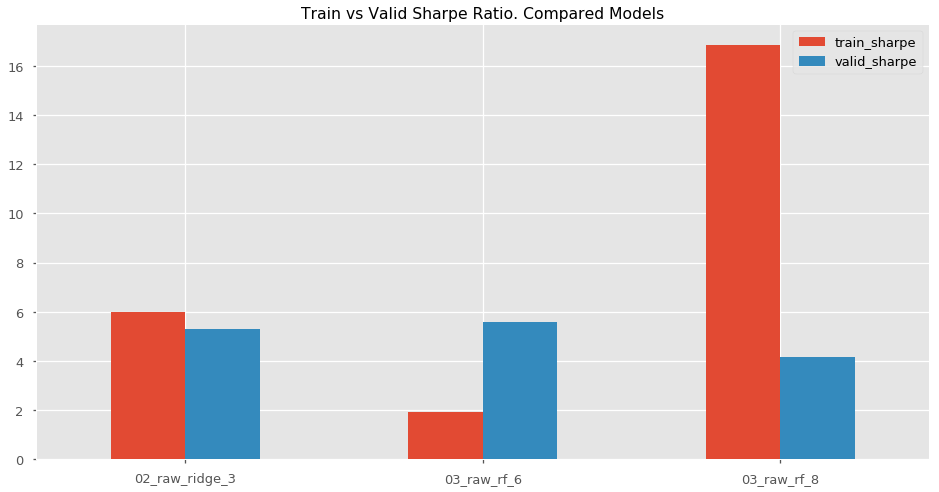

In [25]:
sharpe_ratios_df.loc[comp_models].plot.bar()
plt.title('Train vs Valid Sharpe Ratio. Compared Models')
plt.xticks(rotation=0)
plt.show()

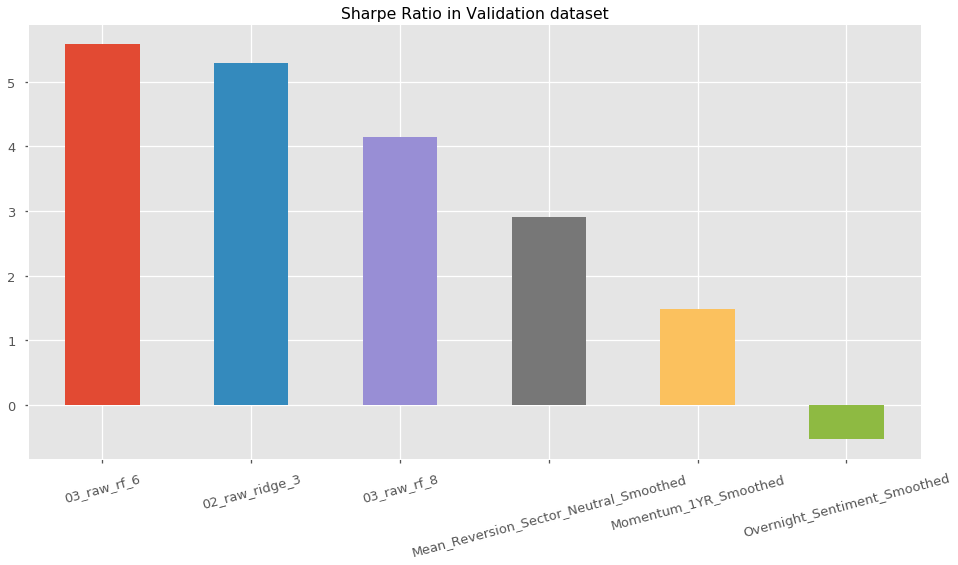

In [32]:
valid_sharpe_factors = valid_sharpe_ratio_lst[0].loc[factor_names]
valid_sharpe_models = sharpe_ratios_df.loc[comp_models, 'valid_sharpe']
valid_sharpe_all_alphas = valid_sharpe_factors.append(valid_sharpe_models)
valid_sharpe_all_alphas.sort_values(ascending=False).plot.bar()
plt.title('Sharpe Ratio in Validation dataset')
plt.xticks(rotation=15)
plt.show()

It can be seen that any model yields a better Sharpe Ratio than any raw alpha factor. However, they are above 4, which maybe too high. In addition, train sharpe ratio in `03_raw_rf_6` is extremely high, this is due to the fact that this model is not strongly regularized.


The same conclusion can be extracted from cummulative factor returns.

## Cummulative Factor Returns

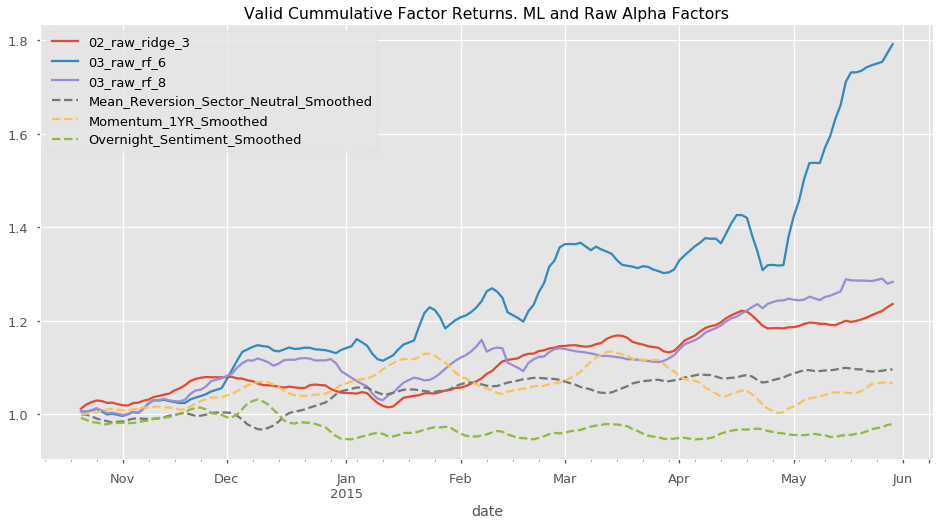

In [33]:
ax = valid_cumrets_df[comp_models].plot()
valid_cumrets_df[factor_names].plot(ax = ax, linestyle='--')
plt.title('Valid Cummulative Factor Returns. ML and Raw Alpha Factors')
plt.show()

# Champion Model. ML-Alpha assessment

In [ ]:


test_ml_alpha, test_factor_returns, test_sharpe_ratio, test_factor_cum_rets, test_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_test, champ_mod_refit, factor_names, all_pricing,
                                  quantiles=None, bins=5, periods = 5, kind='reg')


In [ ]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

ax = axs[0]
test_sharpe_ratio.plot.bar(ax=ax)
ax.set_title('Sharpe ratio in Test')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    
ax = axs[1]
test_factor_cum_rets.plot(ax=ax)
ax.set_title('Cummulative Factor Returns in Test')

plt.show()

There is an expected decrease in Sharpe test ratio (compared with validation), from around 5 to slightly above 1. This Sharpe ratio is better than other alpha factors except `Mometum_1YR_Smoothed`, that yields an exceptionally high Sharpe Ratio.

Considering these insights, the ml-alpha factor is promissing to be leveraged in a portfolio optimization exersice, however, it may be a good aproach to rank and normalize the ml-alpha factor.

A model with a little bit of regularization may yield better results, however, the learnable function is very complex, therefore, more advanced models should be trained (like OverlapRegressor, as in classification models); moreover, in order to train this kind of models, a CV framework may be much more useful than a raw train/valid split

In addition, there is a skew in model direction accuracy, new features that better capture decreasing returns should be added

In [ ]:
OUTFILE1 = 'factor_returns.csv'
test_factor_returns.to_csv(INPATH + OUTFILE1)